In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [16]:
df1 = pd.read_csv("real_estate_db.csv", engine='python')

In [77]:
#Allowing me to not have to re-read the whole file in when I make mistakes.
df = df1

### Research question:
Can we predict the average amount of money made by a household in a given population based on other demographic factors?

The outcome variable will be "mean household income" or "hi_mean" in our orginal dataset.

In [78]:
#Adding a new column that divides the listings by region of the USA.

df['region'] = df['state_ab']

def state_get_region(state):
    if state == 'WA' or state == 'OR' or state == 'CA' or state == 'HI' or state == 'AK':
        return 'Pacific'
    elif state == 'NV' or state == 'ID' or state == 'AZ' or state == 'UT' or state == 'MT' or state == 'WY' or state == 'CO' or state == 'NM':
        return 'Mountain'
    elif state == 'ND' or state == 'SD' or state == 'NE' or state == 'KS' or state == 'MN' or state == 'IA' or state == 'MO':
        return 'West North Central'
    elif state == 'WI' or state == 'IL' or state == 'IN' or state == 'MI' or state == 'OH':
        return 'East North Central'
    elif state == 'VA' or state == 'DC' or state == 'DE' or state == 'MD' or state == 'WV' or state == 'NJ' or state == 'PA' or state == 'NY':
        return 'Mid-Atlantic'
    elif state == 'NC' or state == 'SC' or state == 'GA' or state == 'FL':
        return 'South Atlantic'
    elif state == 'KY' or state == 'TN' or state == 'AL' or state == 'MS':
        return 'East South Central'
    elif state == 'TX' or state == 'OK' or state == 'AR' or state == 'LA':
        return 'West South Central'
    elif state == 'VT' or state == 'MA' or state == 'CT' or state == 'ME' or state == 'NH' or state == 'RI':
        return 'New England'
    elif state == 'PR':
        return 'Puerto Rico'
    else: return state
    
df['region'] = df['region'].apply(lambda x: state_get_region(x))

Creating a new dataframe that is not as big and complicated for the sake of my purposes.

In [79]:
df = df.drop(columns =['hs_degree_male','hs_degree_female','rent_stdev','hi_median','family_median','hc_median','male_age_median','female_age_median','female_age_stdev','male_age_stdev','family_stdev','male_pop','female_pop','COUNTYID','STATEID','SUMLEVEL','AWater','ALand','zip_code','area_code','lat','lng','rent_gt_10','rent_gt_15','rent_gt_20','rent_gt_25','rent_gt_30','rent_gt_35','rent_gt_40','rent_gt_50','BLOCKID','state','city','family_samples','debt_cdf','hc_mortgage_mean','hc_mortgage_median','hc_mortgage_stdev','hc_mortgage_sample_weight','hc_mortgage_samples','universe_samples','used_samples','primary','second_mortgage_cdf','home_equity_cdf','rent_samples','male_age_samples','female_age_samples','UID','hi_stdev','hi_sample_weight','hc_stdev','hc_samples','hc_sample_weight','rent_sample_weight','hi_samples','family_sample_weight','male_age_sample_weight','female_age_sample_weight'])

In [82]:
df_stat = df.loc[:, ['rent_mean', 'hi_mean', 'family_mean', 'male_age_mean', 'female_age_mean', 'hs_degree','divorced','married']]

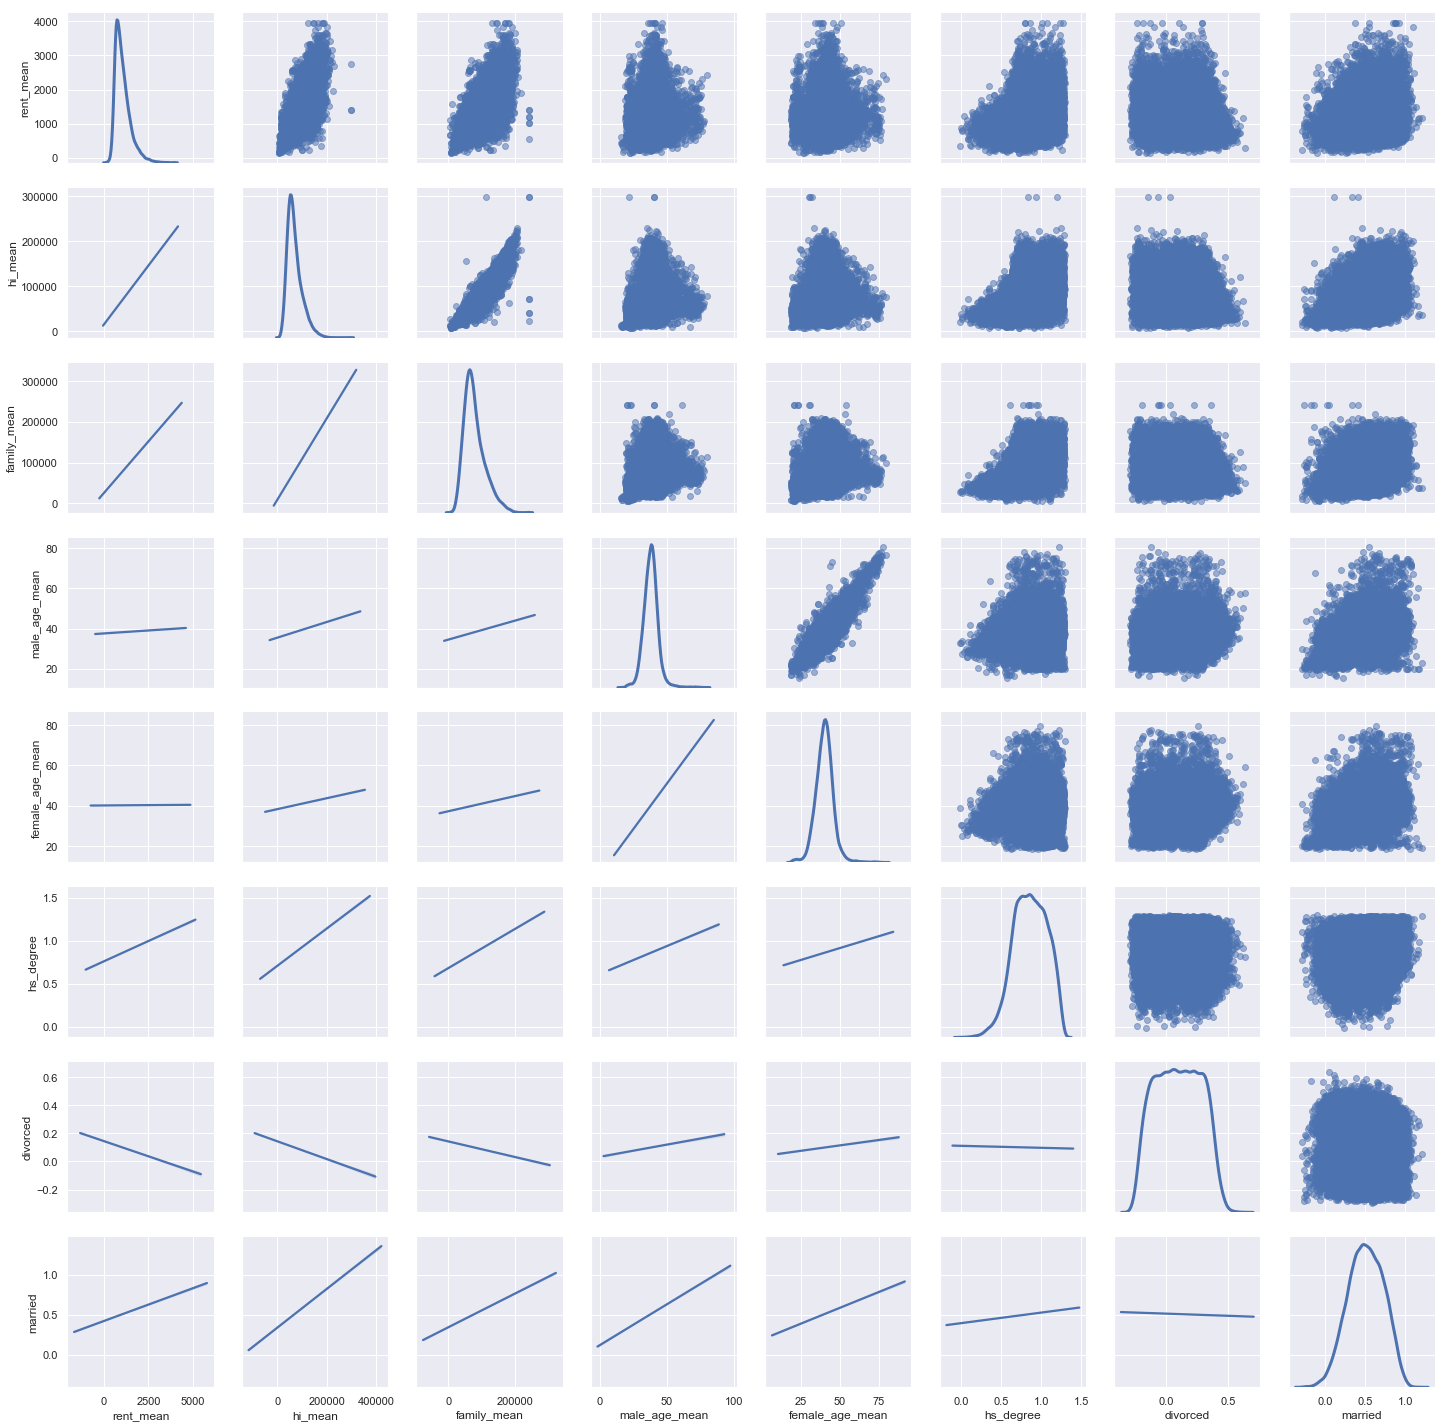

In [83]:
df_jittered = df_stat.loc[:, 'rent_mean':'married'].dropna()

jitter = pd.DataFrame(np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
df_jittered = df_jittered.add(jitter)


g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)

g.map_upper(plt.scatter, alpha=.5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)

plt.show()

                                  pop  rent_mean  rent_median   hi_mean  \
pop                          1.000000   0.162892     0.156816  0.169918   
rent_mean                    0.162892   1.000000     0.976329  0.756413   
rent_median                  0.156816   0.976329     1.000000  0.720552   
hi_mean                      0.169918   0.756413     0.720552  1.000000   
family_mean                  0.131846   0.703433     0.661155  0.962303   
hc_mean                      0.053295   0.603888     0.571258  0.683598   
home_equity_second_mortgage  0.079672   0.126063     0.124714  0.078106   
second_mortgage              0.079135   0.150235     0.148023  0.096328   
home_equity                  0.101634   0.413501     0.391050  0.471163   
debt                         0.234646   0.436572     0.422725  0.419100   
hs_degree                    0.052753   0.364396     0.333955  0.582191   
male_age_mean               -0.184607   0.042452     0.024664  0.209175   
female_age_mean          

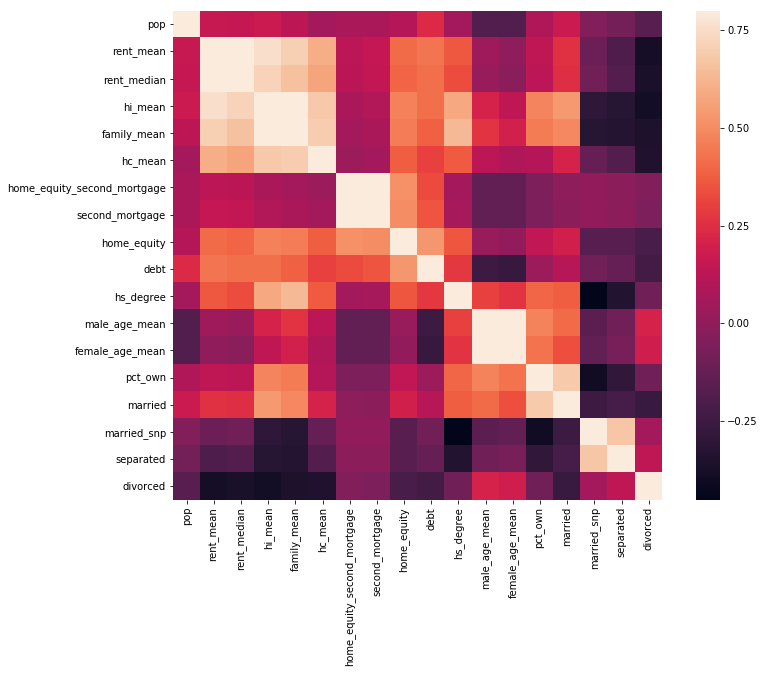

In [22]:
corrmat = df.corr()
print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

# The FacetGrids/boxplots are bad. I would like to improve them.

In [45]:
# I am going to create a long form of the data for region and then for type
df_long = df_stat

In [46]:
df_long['region'] = df['region']
df_long = pd.melt(df_long, id_vars=['region'])

In [73]:
#This is generating a list to populate boxplot's "order" keyword to get rid
# of the warning.
regions_lst = []
df_long_region = list(df_long.region)
for item in df_long_region:
    if item not in regions_lst:
        regions_lst.append(item)

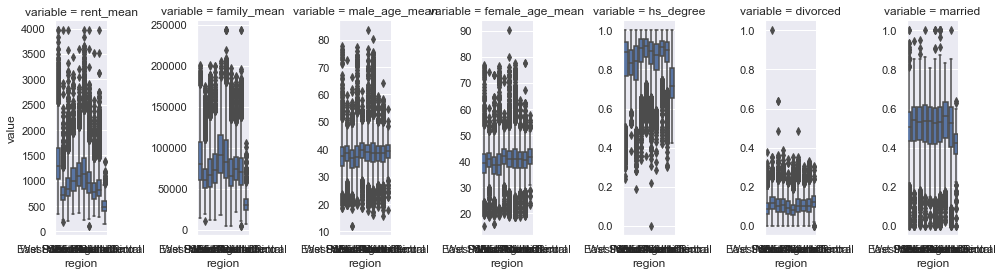

In [84]:
# I would really like help making this look good.
g = sns.FacetGrid(df_long, col="variable", height=4, aspect=.5, sharey=False)
g = g.map(sns.boxplot, "region", "value", order=regions_lst)
plt.show()

In [98]:
#Gonna do the same thing as above but with 'type' instead of 'region'
df_long_type = df_long.drop(columns=['region'])
df_long_type['type'] = df1['type']

In [104]:
#This is generating a list to populate boxplot's "order" keyword to get rid
# of the warning.
type_lst = []
df_long_types = list(df_long_type['type'])
for item in df_long_types:
    if item not in type_lst:
        type_lst.append(item)

# As far as I can tell, this is the same thing as above but it is being picky. I am not sure why there are no boxes for the other variables.

<Figure size 1800x1872 with 0 Axes>

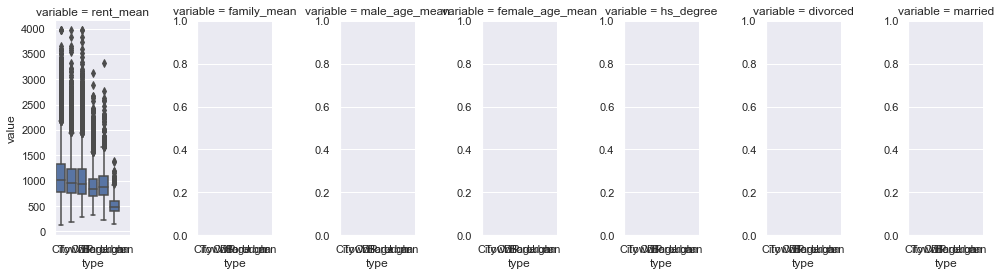

In [115]:
k = sns.FacetGrid(df_long_type, col="variable", height=4, aspect=.5, sharey=False)
k = k.map(sns.boxplot, "type", "value", order=type_lst)
plt.show()

In [29]:
df_cat = df1.loc[:, ['region', 'state_ab']]

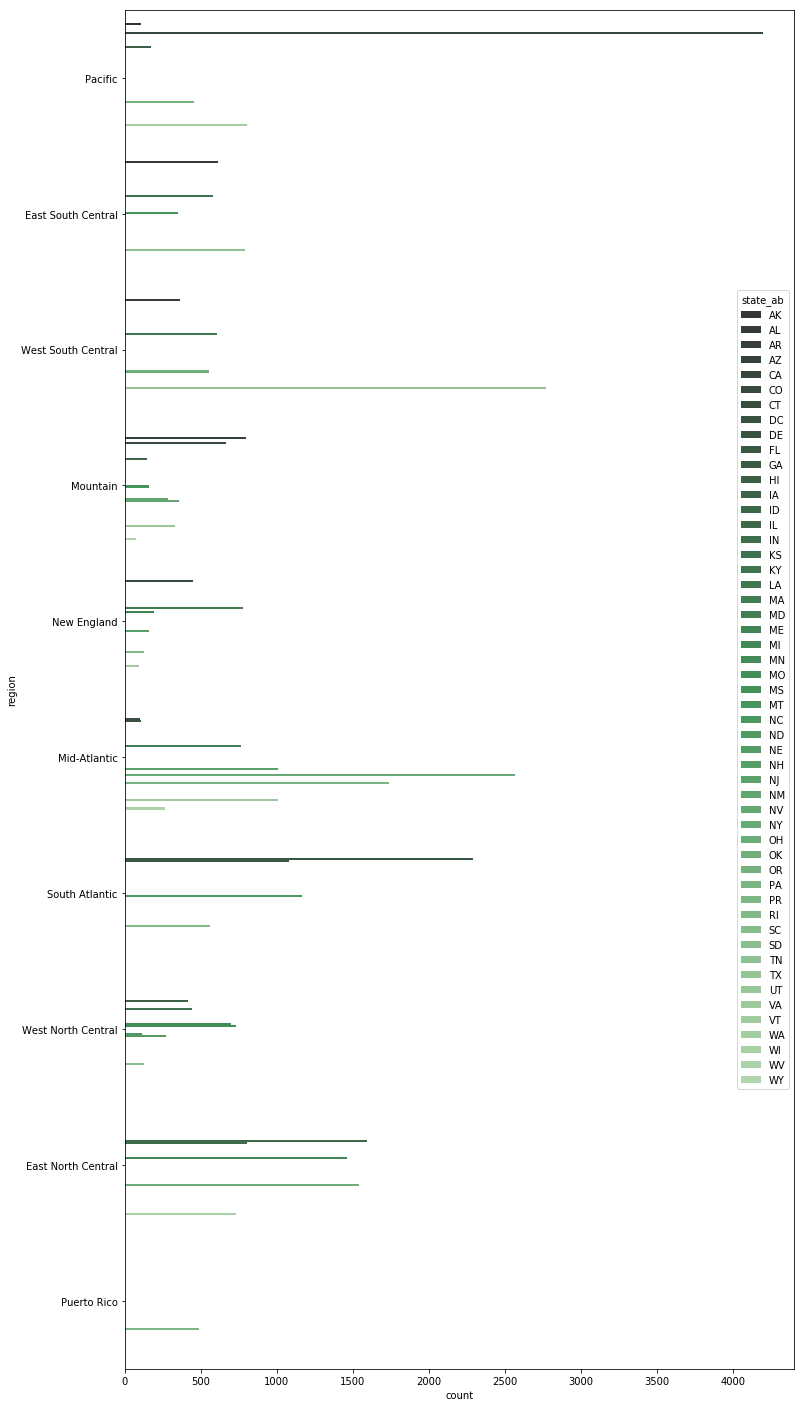

In [30]:
#This has very little relevance. Just wanted to try it because it was in
#The example
plt.figure(figsize=(12, 25))
sns.countplot(y='region', hue='state_ab', data=df_cat, palette='Greens_d')
plt.show()

## Feature Engineering and Selection

In [152]:
#Adding region and type as numerical data instead of categorical
features = pd.get_dummies(df['region'])
features_type = pd.get_dummies(df['type'])
features = pd.concat([features, features_type], axis=1)

In [153]:
#I selected these as my first three features because they seem to have little
#correlation with one another but high correlation with mean household income
features['married'] = df.married
features['hs_degree'] = df.hs_degree

In [154]:
# I would like to average rent and monthly owner cost into one feature.
features['cost_of_housing'] = (df['rent_mean'] + df['hc_mean']) / 2


In [155]:
features['cost_of_housing'].head()

0    1103.459310
1    1530.012535
2    1298.599335
3     717.827935
4    1027.323355
Name: cost_of_housing, dtype: float64

In [156]:
features.head()

East North Central  East South Central  Mid-Atlantic  Mountain  \
0                   0                   0             0         0   
1                   0                   0             0         0   
2                   0                   0             0         0   
3                   0                   0             0         0   
4                   0                   0             0         0   

   New England  Pacific  Puerto Rico  South Atlantic  West North Central  \
0            0        1            0               0                   0   
1            0        1            0               0                   0   
2            0        1            0               0                   0   
3            0        1            0               0                   0   
4            0        1            0               0                   0   

   West South Central  Borough  CDP  City  Town  Urban  Village  married  \
0                   0        0    0     1     0      0        0  0.47388   
1                   0        0    0     1     0      0        0  0.52381   
2                   0        0    0     1     0      0        0  0.50459   
3                   0        0    0     1     0      0        0  0.44428   
4                   0        0    0     1     0      0        0  0.51034   

   hs_degree  cost_of_housing  
0    0.82841      1103.459310  
1    0.94090      1530.012535  
2    0.99097      1298.599335  
3    0.89274       717.827935  
4    0.95351      1027.323355

The five features that I selected are the region, type (city/town/etc.), cost of housing, percent of people married, and percent of people with high school degree.

I picked these categories because they did not have much of a relationship with each other, but were correlated with my outcome variable (mean household income).

The 'married' and 'hs_degree' percentages came straight from the original dataset.

The cost of housing was a result of averaging the mean rent with the mean owner costs.

I used wikipedia for suggestions of how to divide the country into regions and then used get dummies to create the region features.

I used get dummies on the 'type' column of the original dataset to get the type feature.

I have stored these features into the dataframe called "features".